In [0]:
from scipy.stats import norm
import pandas as pd
from numpy.random import choice
import matplotlib.pyplot as plt

In [0]:
Customer=['A','B','C']
prob=[0.1,0.3,0.6]

In [0]:
segment=choice(Customer,size=10000,p=prob)

In [0]:
product_0=[]
product_1=[]
for i in segment:
  if i=='A':
    product_0.append(norm(loc=30,scale=30).rvs())
    product_1.append(norm(loc=70,scale=30).rvs())
  elif i=='B':
    product_0.append(norm(loc=80,scale=20).rvs())
    product_1.append(norm(loc=20,scale=10).rvs())
  else:
    product_0.append(norm(loc=-10,scale=20).rvs())
    product_1.append(norm(loc=-10,scale=20).rvs())


In [0]:
valuation=pd.DataFrame({'segment':segment,'product_0':product_0,'product_1':product_1})

In [8]:
valuation.head()

,segment,product_0,product_1
0,C,-23.515440,19.283798
1,C,-4.758114,-2.757806
2,A,-18.740254,70.438438
3,B,68.213519,33.937524
4,A,2.380193,15.427810


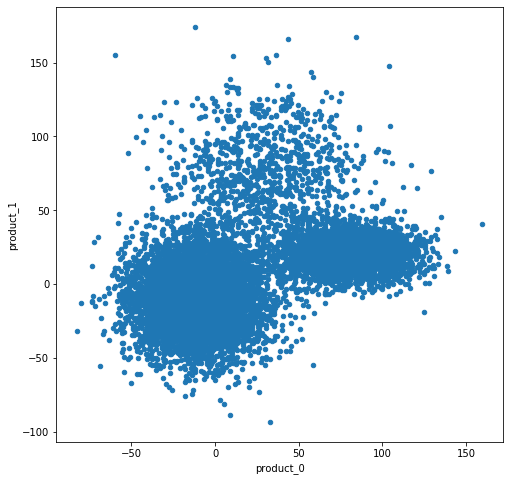

In [10]:
valuation.plot(x='product_0',y='product_1',kind='scatter',figsize=(8,8))

In [0]:
import numpy as np
def demand3(priceVector,df):
  diff=df[['product_0','product_1']]-priceVector
  demand0=((diff['product_0']>=diff['product_1']) & (diff['product_0']>=0)).sum()
  demand1=((diff['product_0']<diff['product_1']) & (diff['product_0']>=0)).sum()
  
  return [demand0,demand1]



In [16]:
%timeit demand3([25,20],valuation)

100 loops, best of 3: 4.2 ms per loop


In [0]:
revenue,p0,p1=0,0,0
for i in range(0,200,5):
  for j in range(0,200,5):
    if np.dot(demand3([i,j],valuation),[i,j])>revenue:
      p0,p1,revenue=i,j,np.dot(demand3([i,j],valuation),[i,j])

In [28]:
print(p0,p1)

60 85
